In [3]:
'''
Write a python program that prints out the original indexes after sorting a list
[2, 1, 8, 6, 9, 3] -> [1 ,2, 3, 6, 9]
                      [1 ,0, 5, 3, 2, 4]
'''

def original_index(num_list: list) -> list:
    sort_list = sorted(num_list)
    return [num_list.index(sort) for sort in sort_list]

In [4]:
original_index([2, 1, 8, 6, 9, 3])

[1, 0, 5, 3, 2, 4]

In [1]:
# Prof solution
lst = [2, 1, 8, 6, 9, 3]
[index for index, value in sorted(enumerate(lst), key = lambda x:x[1])]

[1, 0, 5, 3, 2, 4]

In [11]:
'''
Write a python program to check if a given string is an anagram of another given string. 
Input: "anagram","nagaram"
Output: True
According to wikipedia an anagram is direct word switch or word play, the result 
of rearranging the letters of a word or phrase to produce a new word or phrase,
using all the original letters exactly once; for example, the word anagram can be rearranged
into nag-a-ram.
'''
def anagram(word: str, is_anagram_word: str) -> bool:
    uniq_word = set(word)
    if len(word) != len(is_anagram_word):
        return False
    for uniq in uniq_word:
        if word.count(uniq) != is_anagram_word.count(uniq):
            return False
    return True



In [12]:
anagram('anagram', 'nagaram')

True

In [13]:
anagram('anagram', 'nagarm')

False

In [15]:
anagram('anagram', 'nagarqm')

False

In [3]:
# Prof solution
str1 = 'anagram'
str2 = 'margnaa'
str1 = str1.lower()
str2 = str2.lower()
sorted(str1) == sorted(str2)

True

In [4]:
import pandas as pd

In [54]:
df = pd.read_csv('train.csv')

In [55]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
new_df = df[['LotArea', 'SalePrice']]

In [57]:
new_df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [58]:
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale, MinMaxScaler
import sklearn.metrics as sm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

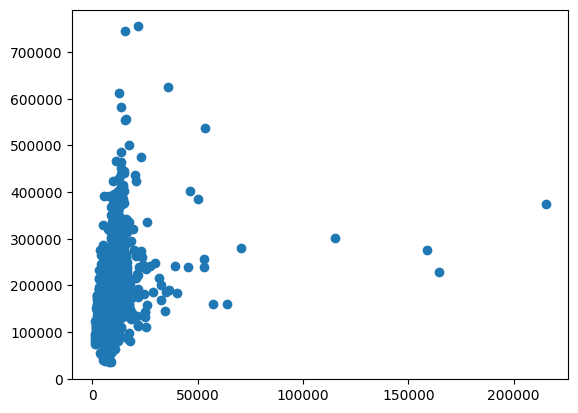

In [59]:
plt.scatter(x=new_df['LotArea'], y=new_df['SalePrice'])

In [60]:
scaler = MinMaxScaler()
scaler.fit(new_df[['SalePrice']])


MinMaxScaler()

In [61]:
# MinMaxScalar can accept a pandas dataframe but not a series
new_df['SalePrice'] = scaler.transform(new_df[['SalePrice']])
new_df

/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_56764/90109858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['SalePrice'] = scaler.transform(new_df[['SalePrice']])


,LotArea,SalePrice
0,8450,0.241078
1,9600,0.203583
2,11250,0.261908
3,9550,0.145952
4,14260,0.298709
...,...,...
1455,7917,0.194556
1456,13175,0.243161
1457,9042,0.321622
1458,9717,0.148903


In [62]:
scaler.fit(new_df[['LotArea']])
new_df.LotArea = scaler.transform(new_df[['LotArea']])
new_df

/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_56764/1392109734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.LotArea = scaler.transform(new_df[['LotArea']])


,LotArea,SalePrice
0,0.033420,0.241078
1,0.038795,0.203583
2,0.046507,0.261908
3,0.038561,0.145952
4,0.060576,0.298709
...,...,...
1455,0.030929,0.194556
1456,0.055505,0.243161
1457,0.036187,0.321622
1458,0.039342,0.148903


In [63]:
km = KMeans(n_clusters=3, random_state=3)
clus_pred_2 = km.fit_predict(new_df[['LotArea', 'SalePrice']])
clus_pred_2

array([0, 0, 0, ..., 0, 2, 2], dtype=int32)

In [64]:
new_df['cluster_new'] = clus_pred_2
new_df

/var/folders/4z/9ddz1dxn051gf97hvy69q3f80000gn/T/ipykernel_56764/1976205527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster_new'] = clus_pred_2


,LotArea,SalePrice,cluster_new
0,0.033420,0.241078,0
1,0.038795,0.203583,0
2,0.046507,0.261908,0
3,0.038561,0.145952,2
4,0.060576,0.298709,0
...,...,...,...
1455,0.030929,0.194556,0
1456,0.055505,0.243161,0
1457,0.036187,0.321622,0
1458,0.039342,0.148903,2


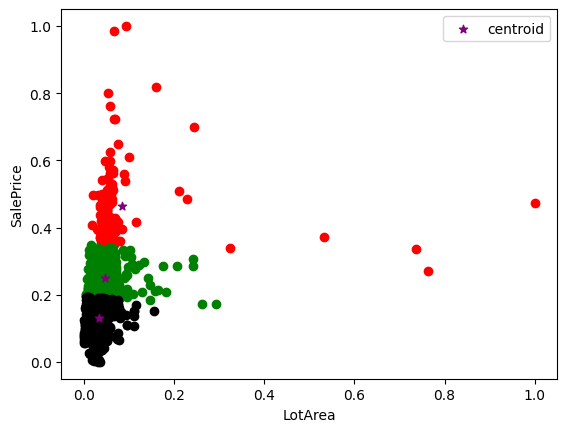

In [66]:
df1 = new_df[new_df.cluster_new == 0]
df2 = new_df[new_df.cluster_new == 1]
df3 = new_df[new_df.cluster_new == 2]

plt.scatter(df1['LotArea'], df1['SalePrice'], color='green')
plt.scatter(df2['LotArea'], df2['SalePrice'], color='red')
plt.scatter(df3['LotArea'], df3['SalePrice'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.legend()

In [67]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(new_df[['LotArea', 'SalePrice']])
    sse.append(km.inertia_)

In [68]:
sse

[20.932815281367,
 9.950107491741523,
 6.833772220223276,
 4.910980073276146,
 3.4676249273628517,
 2.6893779267100224,
 2.2096529623852494,
 1.8421611119639776,
 1.528014077804766]

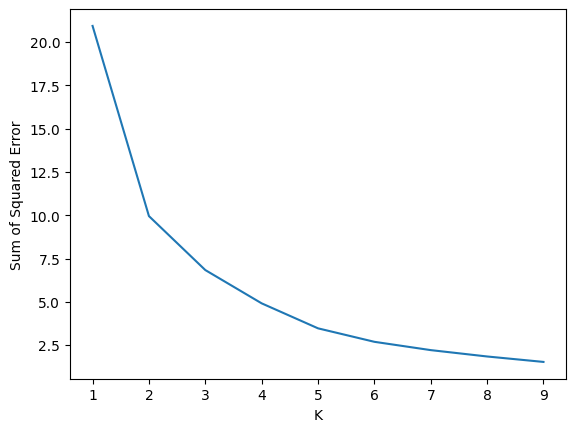

In [69]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

In [70]:
df = pd.DataFrame(scale(df[['LotArea', 'SalePrice']]), columns=['LotArea', 'SalePrice'])
df.head()

,LotArea,SalePrice
0,-0.207142,0.347273
1,-0.091886,0.007288
2,0.073480,0.536154
3,-0.096897,-0.515281
4,0.375148,0.869843


In [72]:
km = KMeans(n_clusters=3, random_state=3)
df['cluster_new'] = km.fit_predict(df[['LotArea', 'SalePrice']])
df

,LotArea,SalePrice,cluster_new
0,-0.207142,0.347273,0
1,-0.091886,0.007288,0
2,0.073480,0.536154,2
3,-0.096897,-0.515281,0
4,0.375148,0.869843,2
...,...,...,...
1455,-0.260560,-0.074560,0
1456,0.266407,0.366161,0
1457,-0.147810,1.077611,2
1458,-0.080160,-0.488523,0


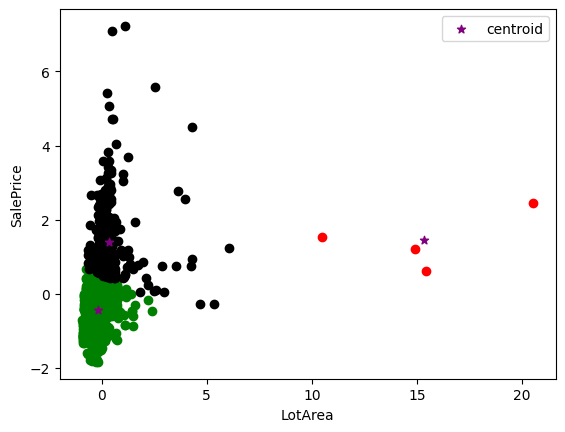

In [73]:
df1 = df[df.cluster_new == 0]
df2 = df[df.cluster_new == 1]
df3 = df[df.cluster_new == 2]

plt.scatter(df1['LotArea'], df1['SalePrice'], color='green')
plt.scatter(df2['LotArea'], df2['SalePrice'], color='red')
plt.scatter(df3['LotArea'], df3['SalePrice'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.legend()

In [74]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['LotArea', 'SalePrice']])
    sse.append(km.inertia_)

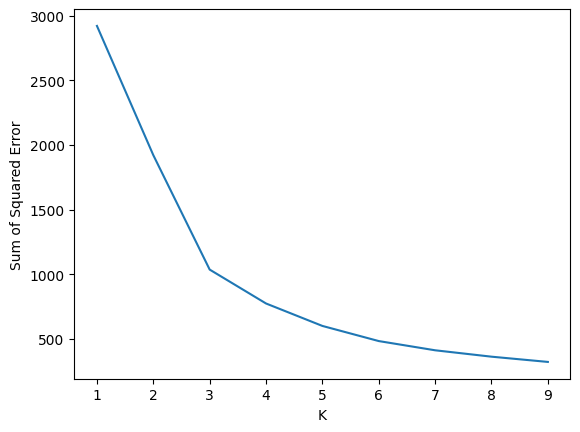

In [75]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)